# Support Vector Machines
In this notebook we will build a `Support Vector Machine` for `classification` using `scikit-learn` and the `Radial Basis Function(RBF) Kernel`. Our training dataset contains continuous and categorical data from the `UCI Machine Learning Repository` to predict whether or not a person will `default on their credit card.`

> `Support Vector Machines` are one of the best machine learning methods when getting the answer is a higher priority than understanding why you get the correct answer. They work really well with relatively small datasets and they tend to work well `out of the box`. In other words, they do not require much optimization.

> In this notebook we will learn about...
- `Importing Data fro a file`
- `Handling Missing Data`
 - Identifying Missing Data
 - Dealing with Missing Data
- `Down Sampling Data`
- `Formatting the Data for Support Vector Machines`
 - Splitting data into Dependent and Independent Variables
 - One Hot Encoding
 - Centering and Scaling the Data
- `Building a Preliminary Support Vector Machine`
- `Optimizing Parameters with Cross Validation`
 - Using Cross Validation to find the best values for Gamma and Regularization
- `Building, Evaluating, Drawing and Interpreting the Final Support Vector Machine`



> ## Import Required Modules
The very first thing we do is load in a bunch of python modules.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.colors as colors
from sklearn.utils import resample      # Down sample the dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale # Scale and center the data
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.decomposition import PCA

> ## Import the Dataset
Now we load in a data from the `UCI Machine Learning Repository`. Specifically, we are going to use the `Credit Card Default` dataset. This dataset will allow us to predict if someone will default on their credit card payments vased on their sex, age and a variety of other metrics.

In [9]:
df = pd.read_excel('./default of credit card clients.xls', header=1)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


> Now that we have loaded the data into a `DataFrame` called `df`.

> We see a bunch of columns for the variables collected for each customer. The columns are...
- `ID`, The ID number assigned to each customer
- `LIMIT_BAL`, Credit limit
- `SEX`, Gender
- `EDUCATION`, Level of Education
- `MARRIAGE`, Marital Status
- `AGE`, Age
- `PAY_`, When the last 6 bills were payed
- `BILL_AMT`, What the last 6 bills were
- `PAY_AMT`, How much the last payments were
- `default payment next month`

### Note:
The last column name, `default payment next month`, is long. Let's change it to `default`...

In [10]:
df.rename({'default payment next month': 'default'}, axis='columns', inplace=True)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


> Also, the values in the `ID` column were randomly assigned, making it uniformative, so we can drop it...

In [11]:
df.drop('ID', axis=1, inplace=True)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


> ## Let's do some Exploratory Data Analysis

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_0      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

In [14]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [16]:
df.SEX.unique()

array([2, 1])

In [18]:
df.EDUCATION.unique()

array([2, 1, 3, 5, 4, 6, 0])

> For some reason, in addition to the allowed numbers, 1, 2, 3, 4, `EDUCATION` also contains 0, 5, 6. It is possible that `0` represents missing data and `5` and `6` represent categories not mentioned in the specification, but that is just a guess.

In [19]:
df.MARRIAGE.unique()

array([1, 2, 3, 0])

> Like `EDUCATION`, `MARRIAGE` contains `0`, which may be a missing data.

## Handling Missing Data
> ### Identifying Missing Data
The first part of this process is identifying and dealing with `Missing Data`.

> First, let's see what sort of data is in each column.

In [12]:
df.dtypes

LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_0        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
default      int64
dtype: object

> ### Dealing with Missing Data
First, let's see how many rows contain missing values.


In [21]:
len(df[(df['EDUCATION'] == 0) | (df['MARRIAGE'] == 0)])

68

> So, only `68` rows have missing values. Now let's count the total number of rows in the dataset...

In [22]:
len(df)

30000

> So, `68` of `30000` rows, or less than `1%`, contain missing values. Since that still leaves us with more data than we need for a `Support Vector Machine`, will remove the rows with missing values, rather than try to impute their values. We do this by selecting all of the rows that do not contain `0` in either the `EDUCATION` or `MARRIAGE` columns.

In [23]:
df_no_missing = df[(df['EDUCATION'] != 0) & (df['MARRIAGE'] != 0)]
len(df_no_missing)

29932

In [25]:
df_no_missing.EDUCATION.unique()

array([2, 1, 3, 5, 4, 6])

In [26]:
df_no_missing.MARRIAGE.unique()

array([1, 2, 3])

> ## Let's check for the balance of the data

In [30]:
df_no_missing.default.unique()

array([1, 0])

In [31]:
df_no_missing.default.value_counts()

0    23301
1     6631
Name: default, dtype: int64

In [36]:
len(df_no_missing[df_no_missing.default == 0]) / len(df_no_missing), len(df_no_missing[df_no_missing.default == 1]) / len(df_no_missing)

(0.7784645195777095, 0.22153548042229051)

> Looks like the data is not balanced

> ## Down Sample the Data
`Support Vector Machines` are great with small datasets, but not awesome with large ones, and this dataset, while not huge, is big enough to take a long time to optimize with `Cross Validation`. So we'll downsample both categories, customers who did and did not default, to `1000` each.

> First, let's remind ourselves how many customers are in the dataset...

In [37]:
len(df_no_missing)

29932

> `29932` samples is a relatively large number for a `Support Vector Machine`, so let's downsample. To make sure we get `1000` of each category, we start by splitting the data into two `DataFrames`, one for people that did not default and one for people that did.

In [38]:
df_no_default = df_no_missing[df_no_missing['default'] == 0]
df_default = df_no_missing[df_no_missing['default'] == 1]

> Now downsample the dataset that did not default...


In [39]:
df_no_default_ds = resample(df_no_default, replace=False, n_samples=1000, random_state=42)
len(df_no_default_ds)

1000

In [40]:
df_default_ds = resample(df_default, replace=False, n_samples=1000, random_state=42)
len(df_default_ds)

1000

> Now let's merge the two downsampled datasets into a single `DataFrame` and print out the total number of samples to make sure everything is working well

In [43]:
df_ds = pd.concat([df_no_default_ds, df_default_ds])
len(df_ds)

2000

> ## Formatting the Data for Support Vector Machines
> ### Split the data into Dependent and Independet Features

In [44]:
X = df_ds.drop('default', axis=1).copy()
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
641,130000,2,3,1,28,0,0,0,0,-2,-2,100143,50456,50000,0,0,0,2500,1000,0,0,0,0
4678,170000,1,3,1,29,0,0,0,0,0,0,165027,168990,172307,35234,32869,33862,7200,7500,1200,1200,1500,1300
16004,180000,2,2,1,29,0,0,0,0,0,0,25781,26000,26310,26662,26166,26176,1800,1800,1500,1056,950,1000
22974,210000,2,2,2,32,-2,-2,-2,-2,-2,-2,355,975,410,0,0,0,979,412,0,0,0,0
17535,190000,2,3,1,45,0,0,0,0,0,0,76433,78472,80548,81778,83082,84811,3300,3331,3359,2663,2751,3000


In [45]:
y = df_ds['default'].copy()
y.head()

641      0
4678     0
16004    0
22974    0
17535    0
Name: default, dtype: int64

> Now that we have created `X`, which has the data we wnat to use to make predictions, and `y`, which has the data we want to predict, we are ready to continue formatting `X` so that it is suitable for making a `Support Vector Machine`.

> ### One Hot Encoding

In [47]:
pd.get_dummies(X, columns=['MARRIAGE'], drop_first=True).head()

,LIMIT_BAL,SEX,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,MARRIAGE_2,MARRIAGE_3
641,130000,2,3,28,0,0,0,0,-2,-2,100143,50456,50000,0,0,0,2500,1000,0,0,0,0,0,0
4678,170000,1,3,29,0,0,0,0,0,0,165027,168990,172307,35234,32869,33862,7200,7500,1200,1200,1500,1300,0,0
16004,180000,2,2,29,0,0,0,0,0,0,25781,26000,26310,26662,26166,26176,1800,1800,1500,1056,950,1000,0,0
22974,210000,2,2,32,-2,-2,-2,-2,-2,-2,355,975,410,0,0,0,979,412,0,0,0,0,1,0
17535,190000,2,3,45,0,0,0,0,0,0,76433,78472,80548,81778,83082,84811,3300,3331,3359,2663,2751,3000,0,0


> Let's use `One Hot Encoding` on all the categorical columns and save the result.

In [48]:
X_encoded = pd.get_dummies(X, columns=['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'])
X_encoded.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,PAY_0_-2,PAY_0_-1,PAY_0_0,PAY_0_1,PAY_0_2,PAY_0_3,PAY_0_4,PAY_0_5,PAY_0_6,PAY_0_7,PAY_0_8,PAY_2_-2,PAY_2_-1,PAY_2_0,PAY_2_1,...,PAY_2_3,PAY_2_4,PAY_2_5,PAY_2_6,PAY_2_7,PAY_3_-2,PAY_3_-1,PAY_3_0,PAY_3_2,PAY_3_3,PAY_3_4,PAY_3_5,PAY_3_6,PAY_3_7,PAY_4_-2,PAY_4_-1,PAY_4_0,PAY_4_2,PAY_4_3,PAY_4_4,PAY_4_5,PAY_4_7,PAY_5_-2,PAY_5_-1,PAY_5_0,PAY_5_2,PAY_5_3,PAY_5_4,PAY_5_5,PAY_5_6,PAY_5_7,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7
641,130000,28,100143,50456,50000,0,0,0,2500,1000,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4678,170000,29,165027,168990,172307,35234,32869,33862,7200,7500,1200,1200,1500,1300,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
16004,180000,29,25781,26000,26310,26662,26166,26176,1800,1800,1500,1056,950,1000,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
22974,210000,32,355,975,410,0,0,0,979,412,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
17535,190000,45,76433,78472,80548,81778,83082,84811,3300,3331,3359,2663,2751,3000,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [49]:
X_encoded.shape

(2000, 81)

> ### Centering and Scaling
The `Radial Basis Function (RBF)` that we are using with our `Support Vector Machine` assumes that the data are centered and scaled. In other words, each column should have a mean value = 0 and a standard deviation = 1. So we need to do this to both the training and testing datasets.

> #### Note:
We split the data into training and testing datasets and then scale them seperately to avoid `Data Leakage`. Data leakage occurs when information about the training dataset currupts or influences the testing dataset.

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

> ## Build a Preliminary Support Vector Machine
At long last, the data is correctly formatted for making a `Support Vector Machine`!!! So let's do it.

In [52]:
clf_svm = SVC(random_state=42)
clf_svm.fit(X_train_scaled, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

> Ok, we've built a `Support Vector Machine` for classification. Let's see how it performs on the `Testing Dataset` and draw a `Confusion Matrix`.

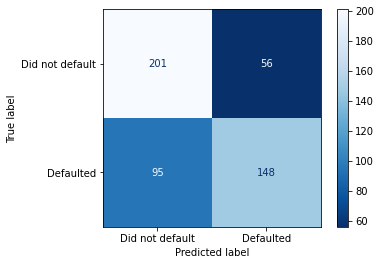

In [57]:
plot_confusion_matrix(clf_svm, X_test_scaled, y_test, display_labels=['Did not default', 'Defaulted'], values_format='d', cmap='Blues_r')

> In the confusion matrix, we see that of the `257` people that did not default, `201` were correctly classified. And of the `243` people that defaulted, `148` were correctly classified. So the `Support Vector Machine` was not awesome. So let's try to improve predictions using `Cross Validation` to optimize the parameters.

> ## Optimizing Parameters with Cross Validation and GridSearchCV()
Optimizing a `Support Vector Machine` is all about finding the best value for `gamma`, and, potentially, the regularization parameter, `C`. So let's see if we can find better parameters values using cross validation in hnope that we can improve the accuracy with the `Testing Dataset`.

> Since we have two parameters to optimize, we will use `GridSearchCV`. We specify a bunch of potential values for `gamma` and `C` and `GridSearchCV()` test all possible combinations of the parameters for us.

In [58]:
param_grid = [{
    'C': [0.5, 1, 10, 100],     # Values for `C` must be > 0
    'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}]

In [59]:
optimal_params = GridSearchCV(SVC(), param_grid=param_grid, n_jobs=-1, cv=5, scoring='accuracy', verbose=0)

In [60]:
optimal_params

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': [0.5, 1, 10, 100],
                          'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [63]:
optimal_params.fit(X_train_scaled, y_train)
print(optimal_params.best_params_)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


> And we see the ideal parameters

> ## Building, Evaluating, Drawing and Interpreting the Final Support Vector Machine
Now that we have the ideal values for `C` and `gamma` we can build the final `Support Vector Machine`.

In [64]:
clf_svm = SVC(random_state=42, C=100, gamma=0.001)
clf_svm.fit(X_train_scaled, y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

> Now let's draw another confusion matrix to see if the optimized support vector machine does better.

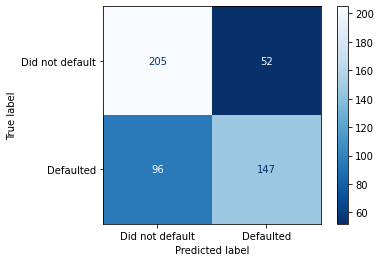

In [65]:
plot_confusion_matrix(clf_svm, X_test_scaled, y_test, display_labels=['Did not default', 'Defaulted'], values_format='d', cmap='Blues_r')

> 4 more people were correctly classified as not defaulting and only 1 more person was incorrectly classified as defaulting.

> The last thing we are going to do is draw a support vector machine decision boundary and discuss how to interpret it. The first thing we need to do is count the number of columns in `X`.

In [66]:
len(df_ds.columns)

24

> We will use `PCA (Principal Component Analysis)` to combine the 24 features into 2 orthogonal meta-features that we can axes for a graph.

> We can determine the accuracy of the graph by drawing something called a `scree plot`.

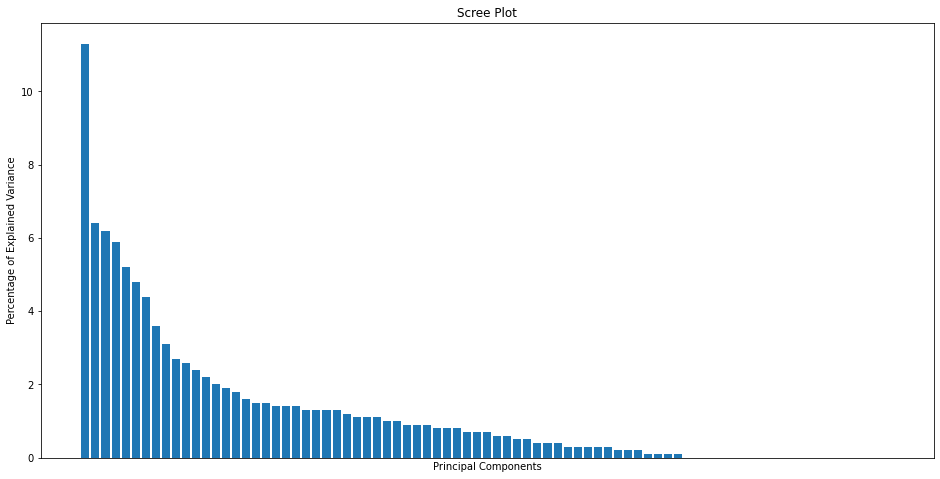

In [69]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = [str(x) for x in range(1, len(per_var) + 1)]

plt.figure(figsize=(16, 8))
plt.bar(x=range(1, len(per_var) + 1), height=per_var)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Components')
plt.title('Scree Plot')
plt.show()

> The `Scree Plot` shows that the first principal component, PC1, accounts for a relatively large amount of variation in the raw data, and this means that it will be a good candidate for the x-axis in the 2-dimensional graph. 

> Now we will draw the PCA graph

In [70]:
train_pc1_coords = X_train_pca[:, 0]
train_pc2_coords = X_train_pca[:, 1]

pca_train_scaled = scale(np.column_stack((train_pc1_coords, train_pc2_coords)))

param_grid = [{
    'C': [1, 10, 100, 1000],     # Values for `C` must be > 0
    'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}]

optimal_params = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', verbose=0)
optimal_params.fit(pca_train_scaled, y_train)
print(optimal_params.best_params_)

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}


> Now that we have teh optimal values for `C` and `gamma`, let's draw the graph.

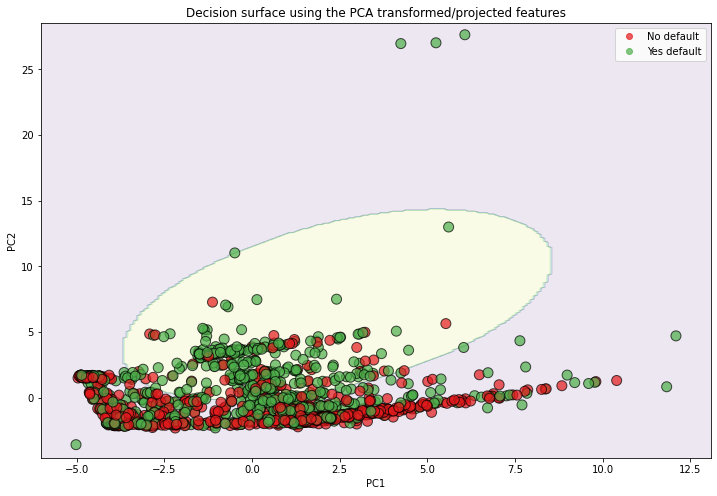

In [75]:
clf_svm = SVC(random_state=42, C=1000, gamma=0.001)
clf_svm.fit(pca_train_scaled, y_train)

X_test_pca = pca.transform(X_train_scaled)

test_pca1_coords = X_test_pca[:, 0]
test_pca2_coords = X_test_pca[:, 1]

x_min = test_pca1_coords.min() - 1
x_max = test_pca1_coords.max() + 1

y_min = test_pca2_coords.min() - 1
y_max = test_pca2_coords.max() + 1

xx, yy = np.meshgrid(np.arange(start=x_min, stop=x_max, step=0.1),
                     np.arange(start=y_min, stop=y_max, step=0.1))

Z = clf_svm.predict(np.column_stack((xx.ravel(), yy.ravel())))

Z = Z.reshape(xx.shape)

fig, ax = plt.subplots(figsize=(12, 8))
ax.contourf(xx, yy, Z, alpha=0.1)
cmap = colors.ListedColormap(['#e41a1c', '#4daf4a'])

scatter = ax.scatter(test_pca1_coords, test_pca2_coords, c=y_train, cmap=cmap, s=100, edgecolors='k', alpha=0.7)

legend = ax.legend(scatter.legend_elements()[0], scatter.legend_elements()[1], loc='upper right')
legend.get_texts()[0].set_text('No default')
legend.get_texts()[1].set_text('Yes default')

ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_title('Decision surface using the PCA transformed/projected features')
plt.show()